In [3]:
import os
import librosa
import numpy as np

In [4]:
data_path = '/Users/nooru/Documents/Internship_starter_week/Ravedess dataset'

emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}


In [5]:
audio_file_paths = [] #will contain all the paths of .wav files 
labels = []  #will contain emotions categories such neytral, clam , happy etc

for root, dirs, files in os.walk(data_path):  #root = main folder, dirs = sub folder, files = .wav files 
    #print(root)
    for file in files:
        #print(file)
        if file.endswith('.wav'):
            file_path = os.path.join(root, file)  #join root and .wav file path 
            audio_file_paths.append(file_path) 
            emotion_code = file.split('-')[2]    #splitting and indexing to get 3rd number 
            labels.append(emotion_map.get(emotion_code, 'unknown'))  #gte value of key (emotion code) if available else unknown


In [6]:
print(audio_file_paths)

['/Users/nooru/Documents/Internship_starter_week/Ravedess dataset\\Actor_01\\03-01-01-01-01-01-01.wav', '/Users/nooru/Documents/Internship_starter_week/Ravedess dataset\\Actor_01\\03-01-01-01-01-02-01.wav', '/Users/nooru/Documents/Internship_starter_week/Ravedess dataset\\Actor_01\\03-01-01-01-02-01-01.wav', '/Users/nooru/Documents/Internship_starter_week/Ravedess dataset\\Actor_01\\03-01-01-01-02-02-01.wav', '/Users/nooru/Documents/Internship_starter_week/Ravedess dataset\\Actor_01\\03-01-02-01-01-01-01.wav', '/Users/nooru/Documents/Internship_starter_week/Ravedess dataset\\Actor_01\\03-01-02-01-01-02-01.wav', '/Users/nooru/Documents/Internship_starter_week/Ravedess dataset\\Actor_01\\03-01-02-01-02-01-01.wav', '/Users/nooru/Documents/Internship_starter_week/Ravedess dataset\\Actor_01\\03-01-02-01-02-02-01.wav', '/Users/nooru/Documents/Internship_starter_week/Ravedess dataset\\Actor_01\\03-01-02-02-01-01-01.wav', '/Users/nooru/Documents/Internship_starter_week/Ravedess dataset\\Actor_

In [12]:
print(labels)

['neutral', 'neutral', 'neutral', 'neutral', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'fearful', 'fearful', 'fearful', 'fearful', 'fearful', 'fearful', 'fearful', 'fearful', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'surprised', 'surprised', 'surprised', 'surprised', 'surprised', 'surprised', 'surprised', 'surprised', 'neutral', 'neutral', 'neutral', 'neutral', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'calm', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'sad', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'fearful', 'fearful', 'fearful', 'fearful', 'fearful', 'fearful', 'fearful', 'fearful', 'disgust', 'dis

Extracting mel frequency cepstral coefficients (mfcc)

In [7]:
def extract_features(file_path): 
    audio_data, sample_rate  = librosa.load(file_path, sr=None)  #load without sampling rate 
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)  #mfcc is 2d array containing mfcc features over time
    #print(mfccs) 
    #we had different no. of columns for each .wav file as time is different
    mfccs_scaled = np.mean(mfccs.T, axis=0) #summarize features ; take avg which gives a single vector with 40 columns.
    return mfccs_scaled

features = [extract_features(f) for f in audio_file_paths] #list of 1d array

Averaging the MFCCs over time is helpful for the model as:

- ML models require each sample to have the same number of features. Averaging gives you a fixed-length vector for every audio
- It summarizes the important characteristics of the audio, reducing noise and variability from different audio lengths.
- With consistent, compact feature vectors, models can learn patterns more easily and train faster.

In [8]:
X = np.array(features) #no. of rows = files, columns = mfcc feature
y = np.array(labels)

In [14]:
print(X)

[[-7.2621722e+02  6.8541420e+01  3.2933977e+00 ... -1.2072176e+00
  -1.5949816e+00 -1.4364872e+00]
 [-7.1912830e+02  7.0201569e+01  1.1683969e+00 ... -9.8497850e-01
  -2.0930610e+00 -1.0407910e+00]
 [-7.1499573e+02  6.9689346e+01  3.9245636e+00 ... -1.1444225e+00
  -1.7256124e+00 -1.4505606e+00]
 ...
 [-5.7584576e+02  5.3281605e+01 -2.1947104e+01 ...  1.7294183e+00
  -2.0939900e-01  4.6916481e-02]
 [-5.2246698e+02  4.3700798e+01 -1.4606612e+01 ...  7.8624541e-01
  -6.3460326e-01  2.2084767e-01]
 [-5.3669043e+02  4.3285828e+01 -9.2793140e+00 ...  9.7494185e-01
   1.4702326e-01  1.1836008e+00]]


In [13]:
print(y)

['neutral' 'neutral' 'neutral' ... 'surprised' 'surprised' 'surprised']


scaling 

For each column in your data:
- Subtract the mean of that feature (so the new mean is 0)
- Divide by the standard deviation (so the new standard deviation is 1) 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
#stratify = same proportions in both test and train
#random state = 42 consistency

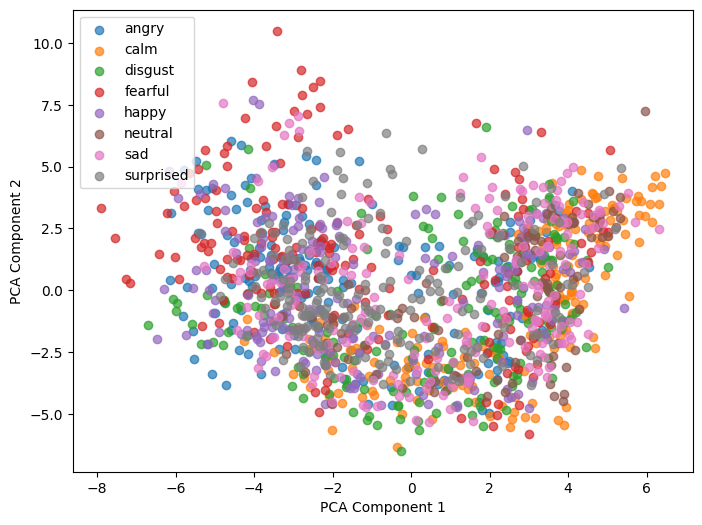

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))  

for label in np.unique(y):  #Loop through each unique emotion label
    idx = y == label        #Find indices where the label matches
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=label, alpha=0.7)  # Plot those points

#plotting the two most imp summaries after projection 
plt.xlabel('PCA Component 1')  
plt.ylabel('PCA Component 2')  
plt.legend()  
plt.show()    

In [12]:
from sklearn.svm import SVC #support vector classifire from SVM 
from sklearn.metrics import classification_report, accuracy_score
svm = SVC(kernel='rbf', C=1, random_state=42) #using rbf as data is not linearly separable 
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5486111111111112


Trying all combinations of C and gamma, training the model for each one using cross-validation to see which one works best
cross validation is using n-1 parts as trainging data and 1 part of data as test to check accuracy of model. here cv = 3
so training = 2 parts, test = 1 part. each time model retrains, test and training parts change. for each of the 16 combinations, the model is trained and validated 3 times on different splits of the data. so tota 48 runs

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=3) #builds a grid of parameters
grid.fit(X_train, y_train) 

print("Best parameters:", grid.best_params_)


Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
svm = SVC(kernel='rbf', gamma = 0.1, C=10, random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred)) #measure of correct predictions


Accuracy: 0.71875


- Precision= Out of all samples predicted as a class, how many were actually that class
- Recall= Out of all actual samples of a class, how many did the model correctly identify
- F1-score= The harmonic mean of precision and recall. It balances both metrics
- Support= The number of true samples for each clas

In [56]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

       angry       0.74      0.74      0.74        38
        calm       0.79      0.87      0.82        38
     disgust       0.69      0.66      0.68        38
     fearful       0.59      0.90      0.71        39
       happy       0.79      0.59      0.68        39
     neutral       0.80      0.42      0.55        19
         sad       0.71      0.66      0.68        38
   surprised       0.77      0.77      0.77        39

    accuracy                           0.72       288
   macro avg       0.74      0.70      0.70       288
weighted avg       0.73      0.72      0.71       288

